# I.Câu hỏi tự luận

## Ex 1:
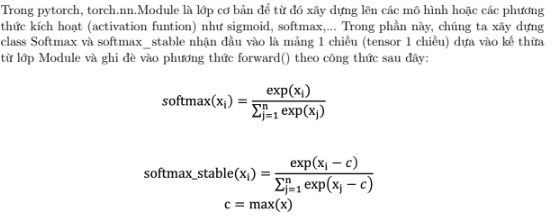

In [1]:
import torch
import torch.nn as nn

class Softmax(nn.Module):
    def __init__(self):
        super(Softmax, self).__init__()

    def forward(self, x):
        exp_x = torch.exp(x)
        return exp_x / torch.sum(exp_x)

class SoftmaxStable(nn.Module):
    def __init__(self):
        super(SoftmaxStable, self).__init__()

    def forward(self, x):
        max_x = torch.max(x)
        exp_x = torch.exp(x - max_x)
        return exp_x / torch.sum(exp_x)

data = torch.Tensor([1, 2, 3])
softmax = Softmax()
output = softmax(data)
print(output)

tensor([0.0900, 0.2447, 0.6652])


## Ex 2:
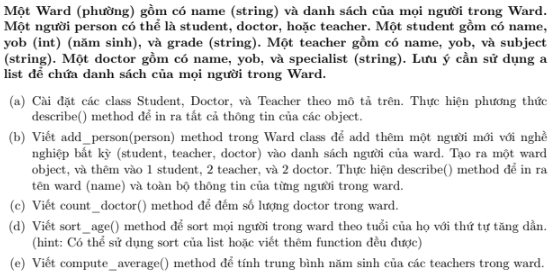

In [2]:
class Person:
    def __init__(self, name, yob):
        self.name = name
        self.yob = yob

    def describe(self):
        raise NotImplementedError("Subclasses should implement this method")

class Student(Person):
    def __init__(self, name, yob, grade):
        super().__init__(name, yob)
        self.grade = grade
        self._yob = yob

    def describe(self):
        print(f"Student - Name: {self.name} - YoB: {self._yob} - Grade: {self.grade}")

    def get_yob(self):
        return self._yob

class Teacher(Person):
    def __init__(self, name, yob, subject):
        super().__init__(name, yob)
        self.subject = subject
        self._yob = yob

    def describe(self):
        print(f"Teacher - Name: {self.name} - YoB: {self._yob} - Subject: {self.subject}")

class Doctor(Person):
    def __init__(self, name, yob, specialist):
        super().__init__(name, yob)
        self.specialist = specialist
        self._yob = yob

    def describe(self):
        print(f"Doctor - Name: {self.name} - YoB: {self._yob} - Specialist: {self.specialist}")

class Ward:
    def __init__(self, name):
        self.name = name
        self.people = []

    def add_person(self, person):
        self.people.append(person)

    def describe(self):
        print(f"Ward Name: {self.name}")
        for person in self.people:
            person.describe()

    def count_doctor(self):
        return sum(1 for person in self.people if isinstance(person, Doctor))

    def sort_age(self):
        self.people.sort(key=lambda person: person.yob)

    def compute_average(self):
        teachers = [person for person in self.people if isinstance(person, Teacher)]
        if not teachers:
            return 0
        return sum(teacher.yob for teacher in teachers) / len(teachers)

# 2(a)
# Student - Name: studentA - YoB: 2010 - Grade: 7
student1 = Student(name="studentA", yob=2010, grade="7")
student1.describe()

# Teacher - Name: teacherA - YoB: 1969 - Subject: Math
teacher1 = Teacher(name="teacherA", yob=1969, subject="Math")
teacher1.describe()

# Doctor - Name: doctorA - YoB: 1945 - Specialist: Endocrinologists
doctor1 = Doctor(name="doctorA", yob=1945, specialist="Endocrinologists")
doctor1.describe()


# 2(b)
# Ward Name: Ward1
# Student - Name: studentA - YoB: 2010 - Grade: 7
# Teacher - Name: teacherA - YoB: 1969 - Subject: Math
# Teacher - Name: teacherB - YoB: 1995 - Subject: History
# Doctor - Name: doctorA - YoB: 1945 - Specialist: Endocrinologists
# Doctor - Name: doctorB - YoB: 1975 - Specialist: Cardiologists

teacher2 = Teacher(name="teacherB", yob=1995, subject="History")
doctor2 = Doctor(name="doctorB", yob=1975, specialist="Cardiologists")
ward1 = Ward(name="Ward1")
ward1.add_person(student1)
ward1.add_person(teacher1)
ward1.add_person(teacher2)
ward1.add_person(doctor1)
ward1.add_person(doctor2)
ward1.describe()

# 2(c)
# Number of doctors: 2
print(f"\nNumber of doctors: {ward1.count_doctor()}")

# 2(d)
# After sorting Age of Ward1 people
# Ward Name: Ward1
# Student - Name: studentA - YoB: 2010 - Grade: 7
# Teacher - Name: teacherB - YoB: 1995 - Subject: History
# Doctor - Name: doctorB - YoB: 1975 - Specialist: Cardiologists
# Teacher - Name: teacherA - YoB: 1969 - Subject: Math
# Doctor - Name: doctorA - YoB: 1945 - Specialist: Endocrinologists

print("\nAfter sorting Age of Ward1 people")
ward1.sort_age()
ward1.describe()

# 2(e)
# Average year of birth (teachers): 1982.0

print(f"\nAverage year of birth (teachers): {ward1.compute_average()}")

Student - Name: studentA - YoB: 2010 - Grade: 7
Teacher - Name: teacherA - YoB: 1969 - Subject: Math
Doctor - Name: doctorA - YoB: 1945 - Specialist: Endocrinologists
Ward Name: Ward1
Student - Name: studentA - YoB: 2010 - Grade: 7
Teacher - Name: teacherA - YoB: 1969 - Subject: Math
Teacher - Name: teacherB - YoB: 1995 - Subject: History
Doctor - Name: doctorA - YoB: 1945 - Specialist: Endocrinologists
Doctor - Name: doctorB - YoB: 1975 - Specialist: Cardiologists

Number of doctors: 2

After sorting Age of Ward1 people
Ward Name: Ward1
Doctor - Name: doctorA - YoB: 1945 - Specialist: Endocrinologists
Teacher - Name: teacherA - YoB: 1969 - Subject: Math
Doctor - Name: doctorB - YoB: 1975 - Specialist: Cardiologists
Teacher - Name: teacherB - YoB: 1995 - Subject: History
Student - Name: studentA - YoB: 2010 - Grade: 7

Average year of birth (teachers): 1982.0


## Ex3:
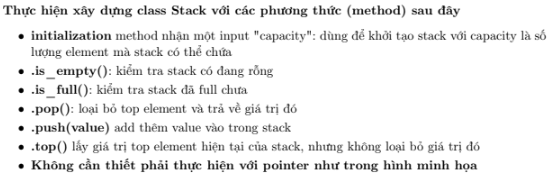
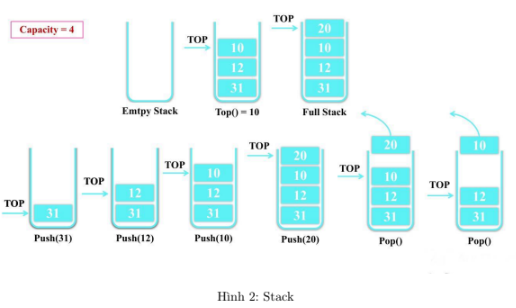

In [3]:
class Stack:
    def __init__(self, capacity):
        self.capacity = capacity
        self.stack = []
    
    def is_empty(self):
        return len(self.stack) == 0
    
    def is_full(self):
        return len(self.stack) == self.capacity
    
    def pop(self):
        if self.is_empty():
            raise IndexError("pop from empty stack")
        return self.stack.pop()
    
    def push(self, value):
        if self.is_full():
            raise OverflowError("push to full stack")
        self.stack.append(value)
    
    def top(self):
        if self.is_empty():
            raise IndexError("top from empty stack")
        return self.stack[-1]


stack1 = Stack(capacity=5)
stack1.push(1)
stack1.push(2)
print(stack1.is_full())  
print(stack1.top())      
print(stack1.pop())      
print(stack1.top())     
print(stack1.pop())      
print(stack1.is_empty())

False
2
2
1
1
True


## Ex4:
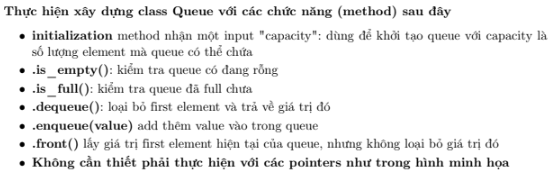
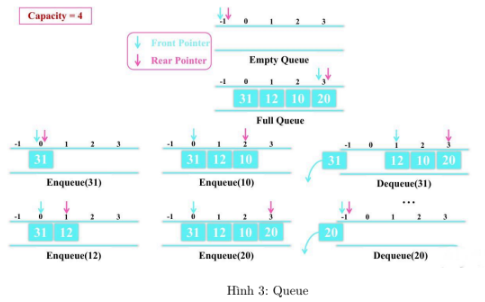

In [4]:
class Queue:
    def __init__(self, capacity):
        self.capacity = capacity
        self.queue = []
    
    def is_empty(self):
        return len(self.queue) == 0
    
    def is_full(self):
        return len(self.queue) == self.capacity
    
    def dequeue(self):
        if self.is_empty():
            return None
        return self.queue.pop(0)
    
    def enqueue(self, value):
        if self.is_full():
            return None
        self.queue.append(value)
    
    def front(self):
        if self.is_empty():
            return None
        return self.queue[0]

queue1 = Queue(capacity=5)
queue1.enqueue(1)
queue1.enqueue(2)
print(queue1.is_full()) 
print(queue1.front())
print(queue1.dequeue()) 
print(queue1.front())
print(queue1.dequeue())
print(queue1.is_empty())

False
1
1
2
2
True


## II. Multiple Choice

### Question 1: C

In [5]:
data = torch.Tensor([1, 2, 3])
softmax = Softmax()
softmax_function = nn.Softmax(dim =0)
output = softmax(data)
assert round(output[0].item(), 2) == 0.09
print(output)

tensor([0.0900, 0.2447, 0.6652])


### Question 2: B

In [6]:
data = torch.Tensor([5 , 2 , 4])
softmax = Softmax()
output = softmax(data)
assert round(output[-1].item(), 2) == 0.26
print(output)

tensor([0.7054, 0.0351, 0.2595])


### Question 3: C

In [7]:
data = torch.Tensor([1 , 2 , 300000000])
softmax = Softmax()
output = softmax(data)
assert round(output[0].item(), 2) == 0.0
print(output)

tensor([0., 0., nan])


### Question 4: B

In [8]:
import torch
import torch.nn as nn

class SoftmaxStable(nn.Module):
    def __init__(self):
        super().__init__()

    def forward ( self , x ) :
        x_max = torch.max(x , dim =0 , keepdims = True)
        x_exp = torch.exp(x - x_max.values)
        partition = x_exp.sum(0 , keepdims = True)
        return x_exp / partition

data = torch . Tensor ([1 , 2 , 3])
softmax_stable = SoftmaxStable()
output = softmax_stable(data)
assert round(output[-1].item(), 2) == 0.67
print(output)

tensor([0.0900, 0.2447, 0.6652])


### Question 5: A

In [9]:
student1 = Student(name="studentZ2023", yob=2011, grade="6")
assert student1._yob == 2011
student1.describe()

Student - Name: studentZ2023 - YoB: 2011 - Grade: 6


### Question 6: B

In [10]:
teacher1 = Teacher(name="teacherZ2023", yob=1991, subject="History")
assert teacher1._yob == 1991
teacher1.describe()

Teacher - Name: teacherZ2023 - YoB: 1991 - Subject: History


### Question 7: A

In [11]:
doctor1 = Doctor(name="doctorZ2023",  yob =1981, specialist ="Endocrinologists")
assert doctor1._yob == 1981
doctor1.describe()

Doctor - Name: doctorZ2023 - YoB: 1981 - Specialist: Endocrinologists


### Question 8: C

In [14]:
student1 = Student(name="studentA", yob=2010, grade="7")
teacher1 = Teacher(name="teacherA", yob=1969, subject="Math")
teacher2 = Teacher(name="teacherB", yob=1995, subject="History")
doctor1 = Doctor(name="doctorA", yob=1945, specialist="Endocrinologists")
doctor2 = Doctor(name="doctorB", yob=1975, specialist="Cardiologists")
ward2 = Ward(name="Ward2")
ward2.add_person(student1)
ward2.add_person(teacher1)
ward2.add_person(teacher2)
ward2.add_person(doctor1)
assert ward2.count_doctor() == 1
ward2.add_person(doctor2)
ward2.count_doctor()

2

### Question 9: B

In [15]:
stack1 = Stack(capacity=5)
stack1.push(1)
assert stack1.is_full() == False
stack1.push(2)
print(stack1.is_full())

False


### Question 10: B

In [16]:
stack1 = Stack(capacity=5)
stack1.push(1)
assert stack1.is_full() == False
stack1.push(2)
print(stack1.top())

2


### Question 11: A

In [17]:
queue1 = Queue(capacity=5)
queue1.enqueue(1)
assert queue1.is_full() == False
queue1.enqueue(2)
print(queue1.is_full()) 

False


### Question 12: D

In [18]:
queue1 = Queue(capacity=5)
queue1.enqueue(1)
assert queue1.is_full() == False
queue1.enqueue(2)
print(queue1.front()) 

1
